In [53]:
import torch
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [54]:
import requests
import zipfile
from pathlib import Path

data_path = Path('data')
image_path = data_path / 'pizza_steak_sushi'

if image_path.is_dir():
    print(f'{image_path} exists')
else:
    print(f'{image_path} does not exist, creating...')
    image_path.mkdir(parents=True, exist_ok=True)

#data\pizza_steak_sushi does not exist, creating...

data\pizza_steak_sushi exists


In [55]:
# Make a request to GitHub to get the information contained in the link and write it to file
with open(data_path / "pizza_steak_sushi.zip", 'wb') as f:  #wb = write permission
    request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    print(f'Downloading {image_path}')
    f.write(request.content)

#Unzip data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", 'r') as zip_ref: #r = read permission
    print(f'Unzipping pizza_steak_sushi.zip')
    zip_ref.extractall(image_path)

# Downloading data\pizza_steak_sushi
# Unzipping pizza_steak_sushi.zip

Unzipping pizza_steak_sushi.zip


In [56]:
import os

def walk_through_dir(dir_path):
    # Walks through dir_path returning its contents
    # os.walk goes through each file and returns info about
    # each one
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

walk_through_dir(image_path)
# There are 2 directories and 0 images in data\pizza_steak_sushi
# There are 3 directories and 0 images in data\pizza_steak_sushi\test
# There are 0 directories and 25 images in data\pizza_steak_sushi\test\pizza
# There are 0 directories and 19 images in data\pizza_steak_sushi\test\steak
# There are 0 directories and 31 images in data\pizza_steak_sushi\test\sushi
# There are 3 directories and 0 images in data\pizza_steak_sushi\train
# There are 0 directories and 78 images in data\pizza_steak_sushi\train\pizza
# There are 0 directories and 75 images in data\pizza_steak_sushi\train\steak
# There are 0 directories and 72 images in data\pizza_steak_sushi\train\sushi

There are 2 directories and 0 images in data\pizza_steak_sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\test
There are 0 directories and 25 images in data\pizza_steak_sushi\test\pizza
There are 0 directories and 19 images in data\pizza_steak_sushi\test\steak
There are 0 directories and 31 images in data\pizza_steak_sushi\test\sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\train
There are 0 directories and 78 images in data\pizza_steak_sushi\train\pizza
There are 0 directories and 75 images in data\pizza_steak_sushi\train\steak
There are 0 directories and 72 images in data\pizza_steak_sushi\train\sushi


In [57]:
# Setup train and testing paths
train_dir = image_path / 'train'
test_dir = image_path / 'test'

Random image path: data\pizza_steak_sushi\test\sushi\2394442.jpg
Image class: sushi
Image height: 408
Image width: 512


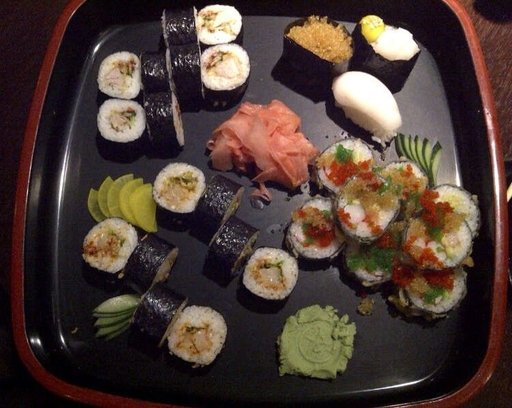

In [58]:
import random
from PIL import Image

# Set seed
random.seed(42)

# 1. Get all the image paths
# any image in train/test folder -> any image in pizza/steak/sushi folder -> any file
# in that folder that is a jpg
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class path name. Get parent folder (e.g. Sushi, steak, pizza)
image_class = random_image_path.parent.stem

# 4. Open Image
img = Image.open(random_image_path)

# 5. Print metadata
print(f'Random image path: {random_image_path}')
print(f'Image class: {image_class}')
print(f'Image height: {img.height}')
print(f'Image width: {img.width}')
img
# Random image path: data\pizza_steak_sushi\test\sushi\2394442.jpg
# Image class: sushi
# Image height: 408
# Image width: 512

(np.float64(-0.5), np.float64(511.5), np.float64(407.5), np.float64(-0.5))

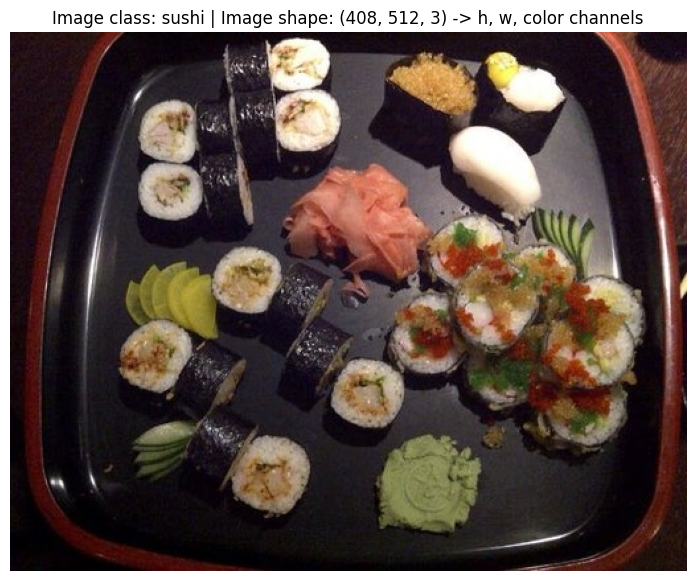

In [59]:
# Lets do it with matplotlib
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f'Image class: {image_class} | Image shape: {img_as_array.shape} -> h, w, color channels')
plt.axis(False)

In [60]:
# Transforming data
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [61]:
# Write a transform for image
data_transform = transforms.Compose([
    # Resize Images to 64x64
    transforms.Resize(size=(64,64)),
    # Flip the images randomly on the horizontal 50% of the time
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [62]:
data_transform(img).shape
#torch.Size([3, 64, 64])

torch.Size([3, 64, 64])

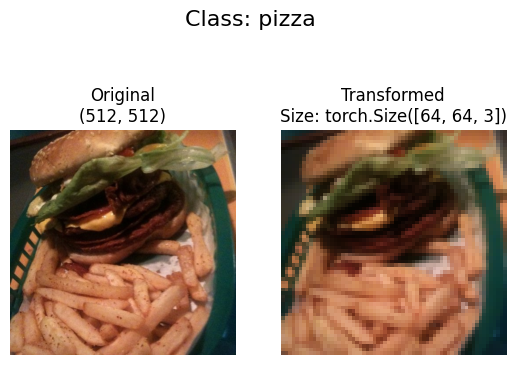

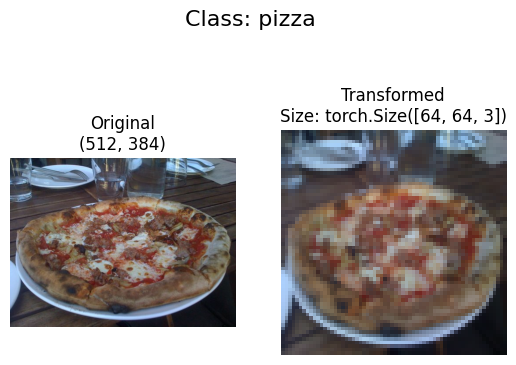

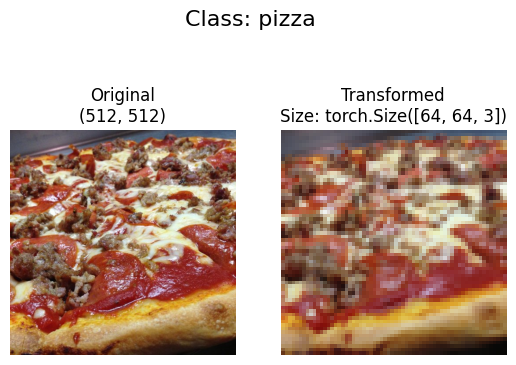

In [63]:
# Lets plot some reshaped images
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
    # Selects random images from a path of images and loads/transforms them
    if seed:
        random.seed(seed)
    # from our random image paths earlier, pick n items
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:

        # Plot the OG image and the transform
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f'Original\n{f.size}')
            ax[0].axis('off')

            #Transform and plot target image
            # Recall our image is in C,H,W and matplotlib likes H,W,C
            transformed_image = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f'Transformed\nSize: {transformed_image.shape}')
            ax[1].axis('off')

            fig.suptitle(f'Class: {image_path.parent.stem}', fontsize=16)

plot_transformed_images(image_paths = image_path_list,
                        transform = data_transform,
                        n=3)

In [64]:
# Loading image data using ImageFolder to create datasets
# from our train and test data
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  # Transform func from earlier
                                  transform=data_transform,
                                  # don't transform labels
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data
# (Dataset ImageFolder
#      Number of datapoints: 225
#      Root location: data\pizza_steak_sushi\train
#      StandardTransform
#  Transform: Compose(
#                 Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
#                 RandomHorizontalFlip(p=0.5)
#                 ToTensor()
#             ),
#  Dataset ImageFolder
#      Number of datapoints: 75
#      Root location: data\pizza_steak_sushi\test
#      StandardTransform
#  Transform: Compose(
#                 Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
#                 RandomHorizontalFlip(p=0.5)
#                 ToTensor()
#             ))

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [65]:
# Get class names as list
class_names = train_data.classes
class_names
#['pizza', 'steak', 'sushi']

['pizza', 'steak', 'sushi']

In [66]:
# Check the lengths of our dataset
len(train_data), len(test_data)
#(225, 75)

(225, 75)

In [67]:
class_dict = train_data.class_to_idx
class_dict
#{'pizza': 0, 'steak': 1, 'sushi': 2}

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [68]:
# Index on the train_data Dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]
img.shape, class_names[label]
#(torch.Size([3, 64, 64]), 'pizza')

(torch.Size([3, 64, 64]), 'pizza')

In [69]:
print(f'Image Tensor:\n{img}')
print(f'Image shape: {img.shape}')
print(f'Image datatype: {img.dtype}')
print(f'Image label: {label}')
print(f'Label datatype: {type(label)}')
# Image Tensor:
# tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
#          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
#          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
#          ...,
#          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
#          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
#          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
#
#         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
#          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
#          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
#          ...,
#          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
#          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
#          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
#
#         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
#          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
#          [0.0196, 0.0157, 0.0157,  ..., 0.0902, 0.0902, 0.0902],
#          ...,
#          [0.1843, 0.1882, 0.1961,  ..., 0.1490, 0.1333, 0.1294],
#          [0.1804, 0.1843, 0.1922,  ..., 0.1255, 0.1137, 0.1098],
#          [0.1765, 0.1804, 0.1882,  ..., 0.1059, 0.0980, 0.1059]]])
# Image shape: torch.Size([3, 64, 64])
# Image datatype: torch.float32
# Image label: 0
# Label datatype: <class 'int'>

Image Tensor:
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.09

Original shape: torch.Size([3, 64, 64]) -> [C,H,W]
Image permute: torch.Size([64, 64, 3]) -> [H,W,C]


Text(0.5, 1.0, 'pizza')

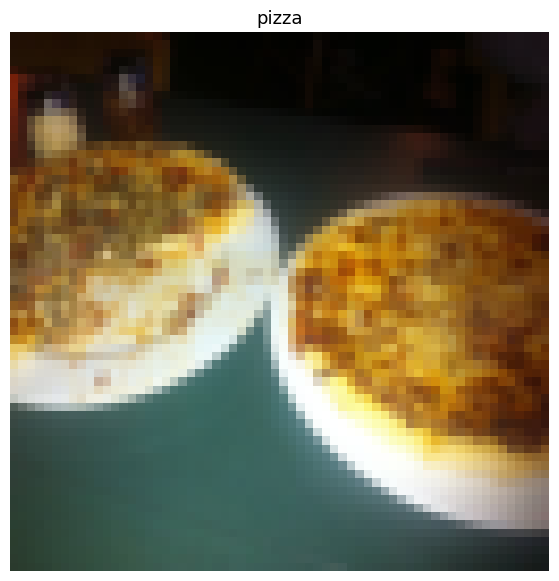

In [70]:
# reorder the dimensions
img_permute = img.permute(1,2,0)

print(f'Original shape: {img.shape} -> [C,H,W]')
print(f'Image permute: {img_permute.shape} -> [H,W,C]')

# Plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis('off')
plt.title(class_names[label], fontsize=13)
# Original shape: torch.Size([3, 64, 64]) -> [C,H,W]
# Image permute: torch.Size([64, 64, 3]) -> [H,W,C]

In [71]:
import os
os.cpu_count()

12

In [72]:
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1, # How many cpu threads are working
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False) # need replicability

In [73]:
len(train_dataloader), len(test_dataloader)
#(8, 3)   8 batches of size 32, 3 batches of size 32

(225, 75)

In [74]:
img, label = next(iter(train_dataloader))

# We reset the batch size to be one, so now each batch will have one image
print(f'Image shape: {img.shape} -> [batch_size, C, H, W]')
print(f'Label shape: {label.shape}')
# Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, C, H, W]
# Label shape: torch.Size([1])

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, C, H, W]
Label shape: torch.Size([1])


In [75]:
# Option 2: Loading Image Data with a Custom Dataset
import PIL
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [76]:
# We want to recreate this functionality
train_data.classes, train_data.class_to_idx
#(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [77]:
# Creating a helper function to get class names
target_directory = train_dir
print(f'Target directory: {target_directory}')

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found
# Target directory: data\pizza_steak_sushi\train
# ['pizza', 'steak', 'sushi']

Target directory: data\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [78]:
# Finds the class folder names in a target directory
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Raise an error if class names could not be found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}")

    # 3. Create a dictionary of index labels
    class_to_idx = {class_name: i  for i, class_name in enumerate(class_names)}

    return classes, class_to_idx

In [79]:
find_classes(target_directory)
#(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [80]:
# Create a custom Dataset class
from torch.utils.data import Dataset
import pathlib

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    # 2. Initialize our custom dataset
    def __init__(self,
                 targ_dir: str,
                 transform=None):
        # 3. Create class attributes. Get all jpg's in the target directories
        # subfolders
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        self.transform = transform
        # Re-use find_classes function
        self.classes, self.class_to_idx = find_classes(targ_dir)

    #4. Create a function to load images
    def load_image(self, index: int) -> Image.Image:
        # get an image at a specified index from our paths list
        image_path = self.paths[index]
        return Image.open(image_path)

    # 5. Overwrite __len__()  (optional)
    def __len__(self) -> int:
        # Returns the total number of samples
        return len(self.paths)
    # 6. Overwrite __getitem__()
    # Returns a tuple of the Image (as a tensor) and the class (int)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        # Returns one sample of data, data and label
        img = self.load_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]

        if self.transform:
            # Returns X, y (image as tensor, label)
            return self.transform(img), class_idx
        else:
            return img, class_idx

In [81]:
# Create a transform
from torchvision import transforms
train_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
test_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [83]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)

(<__main__.ImageFolderCustom at 0x26e115fc050>,
 <__main__.ImageFolderCustom at 0x26e10565220>)

In [84]:
len(train_data), len(train_data_custom)
#(225, 225)

(225, 225)

In [86]:
len(test_data), len(test_data_custom)
#(75, 75)

(75, 75)

In [87]:
train_data_custom.classes
#['pizza', 'steak', 'sushi']

['pizza', 'steak', 'sushi']

In [88]:
train_data_custom.class_to_idx
#{'pizza': 0, 'steak': 1, 'sushi': 2}

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [90]:
# 1. Create a function to take a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    # 2. Adjust display if n is too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10.")

    # 3. Set the seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    # get n amount of images randomly from our data
    random_sample_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(18,8))

    # 6. Loop through random indexes and plot them with matplotlib
    for i, targ_sample in enumerate(random_sample_idx):
        # Get the target image and label from our dataset
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust tensor dimensions for plotting
        targ_image_adjust = targ_image.permute(1,2,0)

        plt.subplot(1,n,i+1)  # we want 1 row of n images at i+1 index
        plt.imshow(targ_image_adjust)
        plt.axis('off')
        if classes:
            title = f'Class: {classes[targ_label]}'
            if display_shape:
                title = title + f'\nshape: {targ_image_adjust.shape}'
        plt.title(title)


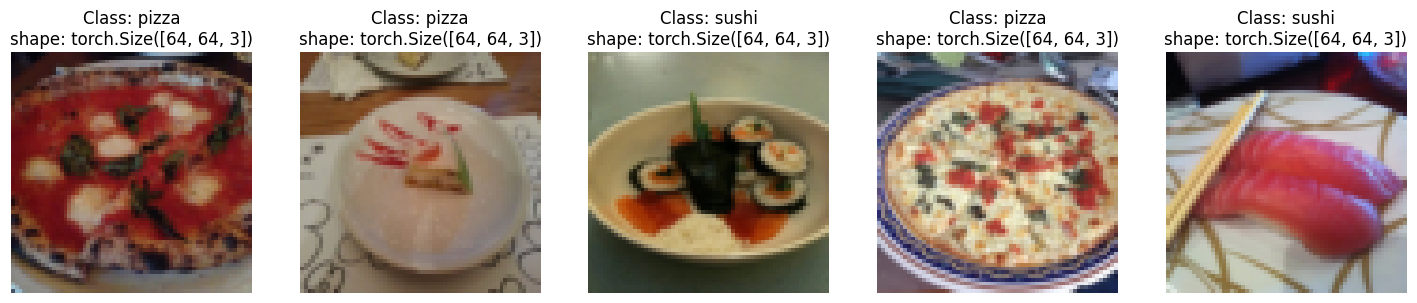

In [91]:
# Display random images from the ImageFolder created Dataset
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

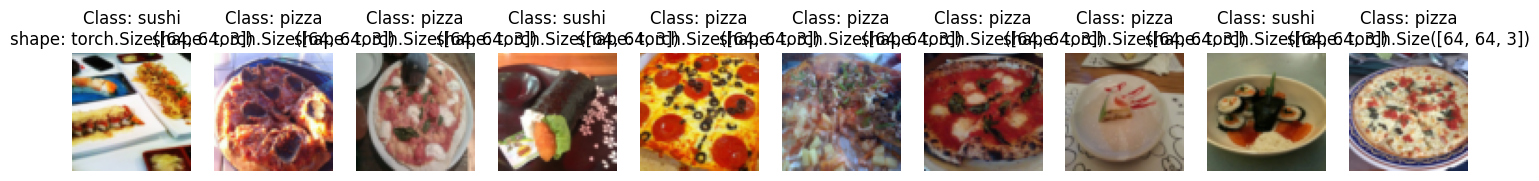

In [92]:
# Display random images from the ImageFolderCustom dataset
display_random_images(train_data_custom,
                      n=10,
                      classes=class_names,
                      seed=42)

In [103]:
# Turn custom loaded images into DataLoaders
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader_custom = DataLoader(train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=0,
                                     shuffle=True)
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=0,
                                    shuffle=False)
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x26e13087950>,
 <torch.utils.data.dataloader.DataLoader at 0x26e13231150>)

In [106]:
# Get image and label from custom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))

img_custom.shape, label_custom.shape
#(torch.Size([32, 3, 64, 64]), torch.Size([32]))

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [107]:
#Lets look at trivialaugment
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=5), # range of 0 to 31
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [108]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]
# [WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
#  WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
#  WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
#  WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
#  WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg'),
#  WindowsPath('data/pizza_steak_sushi/test/pizza/195160.jpg'),
#  WindowsPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'),
#  WindowsPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
#  WindowsPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
#  WindowsPath('data/pizza_steak_sushi/test/pizza/2124579.jpg')]

[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/195160.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2124579.jpg')]

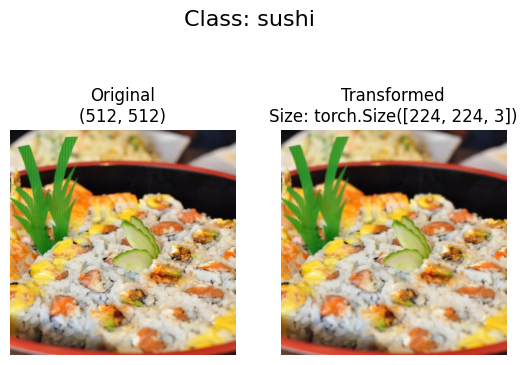

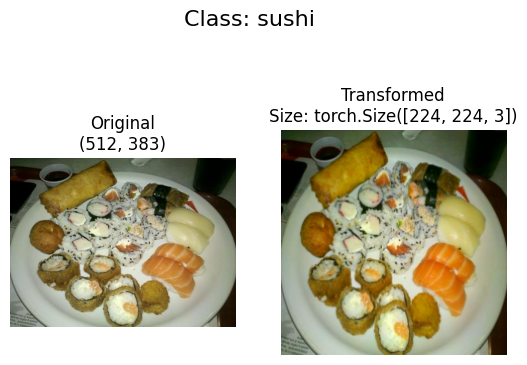

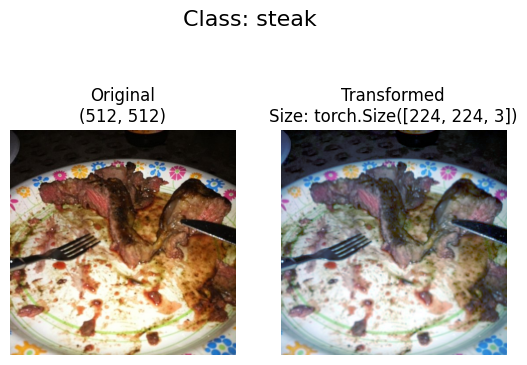

In [109]:
# Plot random transformed images
plot_transformed_images(
    image_paths = image_path_list,
    transform = train_transform,
    n = 3,
    seed = None
)

In [110]:
# Create simple transform
simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [111]:
from torchvision import datasets
# 1. Load and transform data
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)
# 2. Turn the datasets into dataloaders
import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

In [125]:
# Create TinyVGG model class
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int,
                 hidden_units: int,
                 output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # Default is the same as kernel size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # Default is the same as kernel size
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 13 * 13,
                      out_features=output_shape),
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        print(x.shape)
        x = self.conv_block_2(x)
        print(x.shape)
        x = self.classifier(x)
        print(x.shape)
        return x

In [126]:
# Instantiate our model
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

In [127]:
# Lets try a forward pass on a single image
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape
#(torch.Size([32, 3, 64, 64]), torch.Size([32]))

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [129]:
model_0(image_batch.to(device))
# torch.Size([32, 10, 30, 30])
# torch.Size([32, 10, 13, 13])
# torch.Size([32, 3])

torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])


tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4668e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9129e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6414e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7979e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1816e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7226e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3995e-03,  9.4989e-03],
        [ 2.2101e-02, -4.1470e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.1758e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5490e-03],
        [ 2.0768e-02

In [130]:
import torchinfo
from torchinfo import summary

# Batch, C, W, H
summary(model_0, input_size=[1,3,64,64])
# ==========================================================================================
# Layer (type:depth-idx)                   Output Shape              Param #
# ==========================================================================================
# TinyVGG                                  [1, 3]                    --
# ├─Sequential: 1-1                        [1, 10, 30, 30]           --
# │    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
# │    └─ReLU: 2-2                         [1, 10, 62, 62]           --
# │    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
# │    └─ReLU: 2-4                         [1, 10, 60, 60]           --
# │    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
# ├─Sequential: 1-2                        [1, 10, 13, 13]           --
# │    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
# │    └─ReLU: 2-7                         [1, 10, 28, 28]           --
# │    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
# │    └─ReLU: 2-9                         [1, 10, 26, 26]           --
# │    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
# ├─Sequential: 1-3                        [1, 3]                    --
# │    └─Flatten: 2-11                     [1, 1690]                 --
# │    └─Linear: 2-12                      [1, 3]                    5,073
# ==========================================================================================
# Total params: 8,083
# Trainable params: 8,083
# Non-trainable params: 0
# Total mult-adds (Units.MEGABYTES): 5.69
# ==========================================================================================
# Input size (MB): 0.05
# Forward/backward pass size (MB): 0.71
# Params size (MB): 0.03
# Estimated Total Size (MB): 0.79
# ==========================================================================================

torch.Size([1, 10, 30, 30])
torch.Size([1, 10, 13, 13])
torch.Size([1, 3])


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [ ]:
# Create train_step()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.Dataloader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
    # Put the model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calc loss and add to overall train loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate accuracy metric. Take the argmax of our pred probs,
        # and add it to train acc IF it matches the true label of y
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)
    # Adjust metrics to get average loss and acc per batch
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss, train_acc